In [1]:
from ParallelSolve import gurobi_SSKP, majority_vote, SSKP_eval_wSol, sequentialEvaluate, prob_simulate_SSKP
from utils.SSKP_samples import genSample_SSKP
from utils.SSKP_functions import SSKP_eval, comparison_final, evaluation_final, evaluation_parallel, plot_final, plot_CI_final

import time

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from multiprocessing import Queue, Process

In [3]:
# a good set of parameters for pareto distribution

r = [3.2701236422941093, 3.3207149493214994, 3.556858029428708]
c, q = 3.7856629820554946, 1.7096129150007453
sample_args = {
        'type': 'pareto',
        'params': [2.0033248484659976, 1.9462659915572313, 2.0148555044660448]
    }

In [7]:
rng = np.random.default_rng(seed=2024)

B_list = [2,3]
k_list = [0.1, 2]
number_of_iterations = 2
sample_number = np.array([2**i for i in range(6, 9)])
large_number_sample = 200000
eval_time = 10

tic = time.time()
SAA_list, bagging_list = comparison_final(B_list, k_list, number_of_iterations, sample_number, rng, sample_args, r, c, q)
SAA_obj_list, SAA_obj_avg, bagging_obj_list, bagging_obj_avg = evaluation_parallel(SAA_list, bagging_list, large_number_sample, eval_time, rng, sample_args, r, c, q)
print(f"Total time: {time.time()-tic}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, SAA time: 0.1901841163635254
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, B=2, k=0.1, Bagging time: 0.20897889137268066
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, B=2, k=2, Bagging time: 0.22499299049377441
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, B=3, k=0.1, Bagging time: 0.354637861

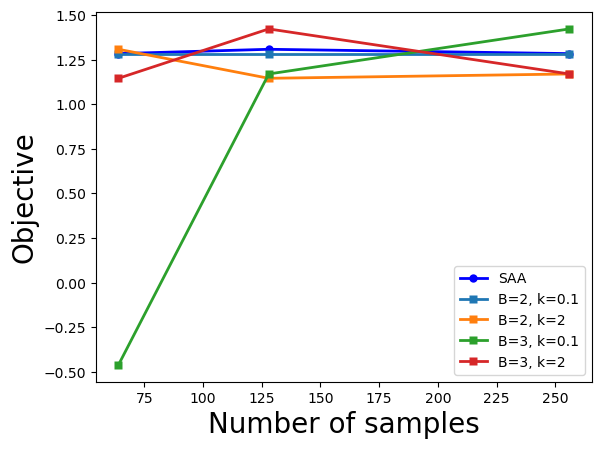

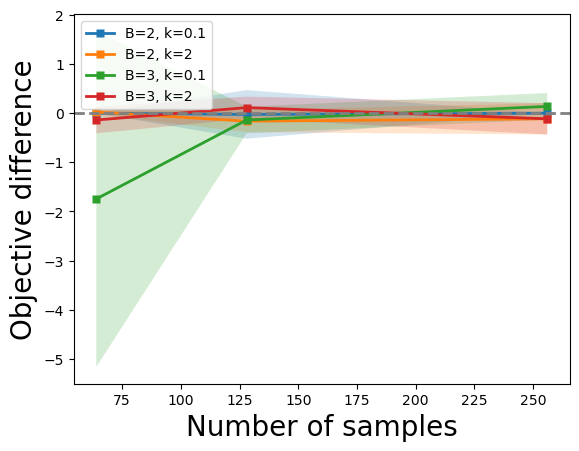

In [8]:
plot_final(SAA_obj_avg, bagging_obj_avg, sample_number, B_list, k_list)
plot_CI_final(SAA_obj_list, bagging_obj_list, sample_number, B_list, k_list)

In [3]:
# a good set of parameters for normal distribution
r = [3.9684306535750262, 3.2906469921257995, 2.50738588369444]
c, q = 3.7198603953667098, 2.4765412437652974

sample_args = {
        'type': 'normal',
        'params': [[2.3083596524357666, 1.6275887515587817, 1.877296803590719], [0.9936612443150282, 0.5733795985461986, 1.2046962768988756]]
    }

In [48]:
rng = np.random.default_rng(seed=2024)

B_list = [50, 100, 200]
k_list = [0.1, 0.2, 2, 10, 50]
number_of_iterations = 50
sample_number = np.array([2**i for i in range(6, 15)])
large_number_sample = 1000000

tic = time.time()
SAA_list, bagging_list = comparison_final(B_list, k_list, number_of_iterations, sample_number, rng, sample_args, r, c, q)
SAA_obj_list, SAA_obj_avg, bagging_obj_list, bagging_obj_avg = evaluation_final(SAA_list, bagging_list, large_number_sample, rng, sample_args, r, c,q)
print(f"Total time: {time.time()-tic}")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, SAA time: 0.16090774536132812
Set parameter Username
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, B=

In [73]:
B_list = [100, 200, 400]
k_list = [0.05, 0.1, 10, 50]
sample_number_log = np.log2(sample_number)
plot_final(SAA_obj_avg, bagging_obj_avg, sample_number_log, B_list, k_list)
plot_CI_final(SAA_obj_list, bagging_obj_list, sample_number_log, B_list, k_list)

NameError: name 'SAA_obj_avg' is not defined

In [93]:
import json
with open("obj_lists.json", "r") as f:
    results = json.load(f)

In [98]:
B_list = ['X', 200, 400]
k_list = ['X', 0.1, 'X', 50]
sample_number = np.array([2**i for i in range(6, 15)])
sample_number_log = np.log2(sample_number)

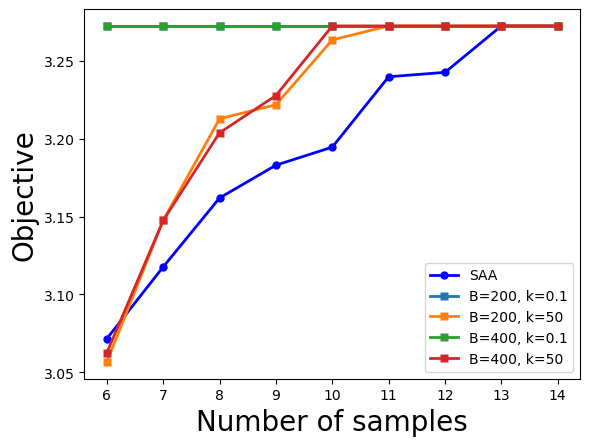

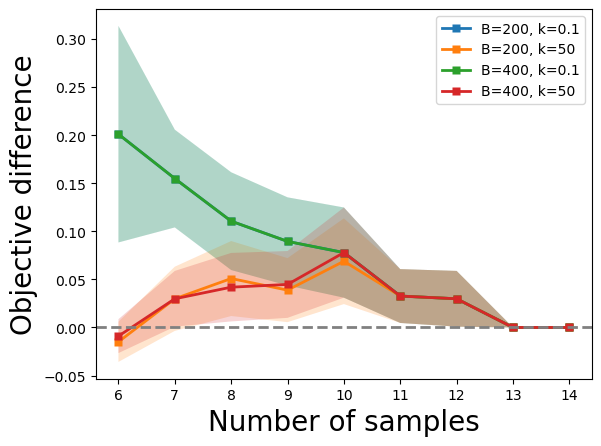

In [99]:
plot_final(results["SAA_obj_avg"], results["bagging_obj_avg"], sample_number_log, B_list, k_list)
plot_CI_final(results["SAA_obj_list"], results["bagging_obj_list"], sample_number_log, B_list, k_list)

In [68]:
def find_parameters(m, B, k, number_of_iterations,sample_number, large_number_sample, rng, sample_type):
    parameters= []
    results_SAA = []
    results_majority = []
    for iter in range(30):
        
        r = np.random.uniform(2.5, 5, size=m)
        c = float(np.random.uniform(3, 5, size=1)[0])
        q = float(np.random.uniform(0, 3, size=1)[0])

        if sample_type == 'pareto':
            params = np.random.uniform(1.7, 2.3, size=m)
        elif sample_type == 'normal':
            mean = np.random.uniform(1.5, 2.8, size=m)
            std = np.random.uniform(0.5, 1.8, size=m)
            params = [mean, std]
        
        sample_args = {
            'type': sample_type,
            'params': params
        }
        tic = time.time()
        SAA_list, bagging_list = comparison_final([B], [k], number_of_iterations, sample_number, rng, sample_args, r, c, q)
        _, SAA_obj_avg, _, bagging_obj_avg = evaluation_final(SAA_list, bagging_list, large_number_sample, rng, sample_args, r, c, q)
        print(f"Iteration {iter}, time: {time.time()-tic}")

        if all(x >= y for x, y in zip(SAA_obj_avg, bagging_obj_avg[0][0])):
            continue
        else:
            name = [iter, [r,c,q], params]
            plot_params(SAA_obj_avg, bagging_obj_avg, sample_number, [B], [k], name)
            parameters.append([r, c, q, sample_args])
            results_SAA.append(SAA_obj_avg)
            results_majority.append(bagging_obj_avg[0][0])
        
    return parameters, results_SAA, results_majority

def plot_params(SAA_obj_avg, bagging_obj_avg, sample_number, B_list, k_list, name):
    _, ax = plt.subplots()
    ax.plot(sample_number, SAA_obj_avg, marker = 'o', markeredgecolor = 'none', color = 'blue',linestyle = 'solid', linewidth = 2, label = 'SAA')
    for ind1, B in enumerate(B_list):
        for ind2, k in enumerate(k_list):
            if B == "X" or k == "X":
                continue
            ax.plot(sample_number, bagging_obj_avg[ind1][ind2], marker = 's', markeredgecolor = 'none', linestyle = 'solid', linewidth = 2, label = f'B={B_list[ind1]}, k={k_list[ind2]}')
    ax.set_xlabel('Number of samples', size = 20)
    ax.set_ylabel('Objective', size = 20)
    ax.legend()
    fig_name  = str(name[0]) + '_' + str(name[1]) + '_' + str(name[2]) + ".png"
    plt.savefig(fig_name)
    # plt.show()
    return
        

In [69]:
rng = np.random.default_rng(seed=2024)
m = 3
B = 200
k = 0.1
number_of_iterations = 2
sample_number = np.array([2**i for i in range(6, 9)])
large_number_sample = 1000000
parameters, results_SAA, results_majority = find_parameters(m, B, k, number_of_iterations, sample_number, large_number_sample, rng, 'normal')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, SAA time: 0.13028717041015625
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Sample size 64, iteration 0, B=

In [4]:
from ParallelSolve import gurobi_SSKP, majority_vote, prob_simulate_SSKP
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from utils.SSKP_functions import genSample_SSKP

# function that calculates the probability \hat p(x) for all x.
# input: sample_number, num_repeats, rng, sample_args, *prob_args
# output: \hat p(x*), \hat p(x*) - max_{x\neq x*} \hat p(x), distribution of \hat p(x)
def SSKP_prob(sample_number, large_number_sample, num_repeats, rng, sample_args, *prob_args):
    # first solve the problem using a large number of samples, get the optimal solution
    # then, simulate the probability \hat p(x)
    
    ########## parts that need to be modified for different problems ##########
    sample_large = genSample_SSKP(large_number_sample, rng, type = sample_args['type'], params = sample_args['params'])
    SAA, _ = majority_vote(sample_large, 1, large_number_sample, gurobi_SSKP, rng, *prob_args)
    ##########
    
    x_star = SAA if type(SAA) == int else tuple(int(entry) for entry in SAA)

    prob_opt_list = []
    prob_diff_list = []
    prob_dist_list = []
    for n in sample_number:
        # use a single function to complete the following loops in parallel
        count = prob_simulate_SSKP(n, num_repeats, rng, sample_args, *prob_args)
        
        prob_opt_list.append(count.get(x_star, 0))
        max_prob = 0
        for key in count:
            if key != x_star:
                max_prob = max(max_prob, count[key])
        prob_diff_list.append(count[x_star] - max_prob)
        prob_dist_list.append(count)
    
    return prob_opt_list, prob_diff_list, prob_dist_list, x_star


In [6]:
sample_number = [2, 10, 50, 200, 1000, 2000]
large_number_sample = 100000
num_repeats = 400
rng = np.random.default_rng(seed=2024)

In [21]:
# a good set of parameters for pareto distribution

r = [3.2701236422941093, 3.3207149493214994, 3.556858029428708]
c, q = 3.7856629820554946, 1.7096129150007453
sample_args = {
        'type': 'pareto',
        'params': [2.0033248484659976, 1.9462659915572313, 2.0148555044660448]
    }

sample_number = [2, 10, 50, 200, 1000, 2000]
large_number_sample = 300000
num_repeats = 1000
rng = np.random.default_rng(seed=2024)

In [22]:
prob_opt_list_1, prob_diff_list_1, prob_dist_list_1, x_star_1 = SSKP_prob(sample_number, large_number_sample, num_repeats, rng, sample_args, r, c, q)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13

In [23]:
r = [
    3.2701236422941093,
    3.3207149493214994,
    3.556858029428708
  ]
c = 3.7856629820554946
q = 1.7096129150007453
sample_args = {
    "type": "pareto",
    "params": [
      1.966,
      2.21,
      1.89
    ]
  }
sample_number = [2, 10, 50, 200, 1000, 2000]
large_number_sample = 300000
num_repeats = 1000
rng = np.random.default_rng(seed=2024)

In [24]:
prob_opt_list_2, prob_diff_list_2, prob_dist_list_2, x_star_2 = SSKP_prob(sample_number, large_number_sample, num_repeats, rng, sample_args, r, c, q)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/envs/vm/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/envs/vm/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/envs/vm/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/envs/vm/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
  File "/opt/anaconda3/envs/vm/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  

KeyboardInterrupt: 

In [ ]:
r = [
    3.3,
    3.2,
    3.6
  ]
c = 3.8
q = 1.7
sample_args = {
    "type": "pareto",
    "params": [
      1.89,
      2.1,
      2.2]}

sample_number = [2, 10, 50, 200, 1000, 2000]
large_number_sample = 300000
num_repeats = 1000
rng = np.random.default_rng(seed=2024)

In [ ]:
prob_opt_list_3, prob_diff_list_3, prob_dist_list_3, x_star_3 = SSKP_prob(sample_number, large_number_sample, num_repeats, rng, sample_args, r, c, q)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13

In [ ]:
r = [
    3.4,
    3.1,
    3.7
  ]
c = 3.8
q = 1.7
sample_args = {
    "type": "pareto",
    "params": [
      2.23,
      1.89,
      2.1]}

sample_number = [2, 10, 50, 200, 1000, 2000]
large_number_sample = 300000
num_repeats = 1000
rng = np.random.default_rng(seed=2024)

In [ ]:
prob_opt_list_4, prob_diff_list_4, prob_dist_list_4, x_star_4 = SSKP_prob(sample_number, large_number_sample, num_repeats, rng, sample_args, r, c, q)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use on

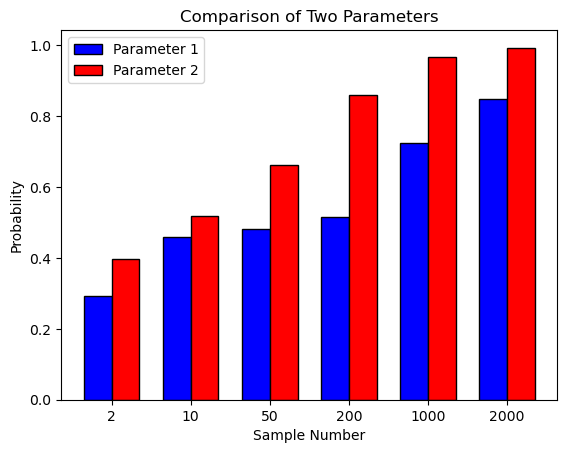

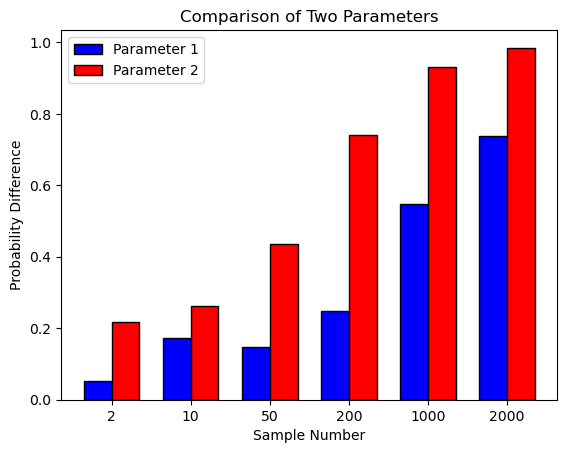

In [19]:
plot_comparison(prob_opt_list_1, prob_opt_list_3, sample_number, 'prob_opt')
plot_comparison(prob_diff_list_1, prob_diff_list_3, sample_number, 'prob_diff')

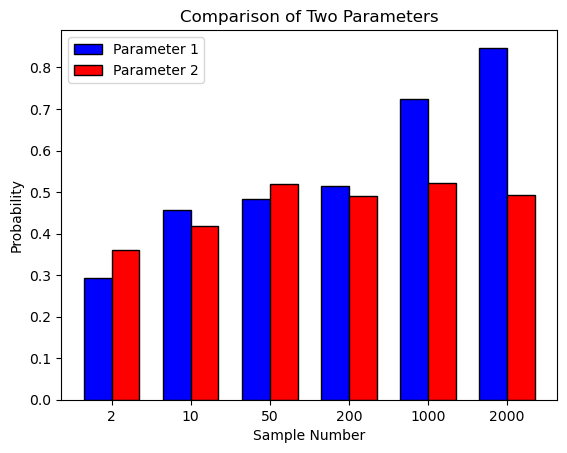

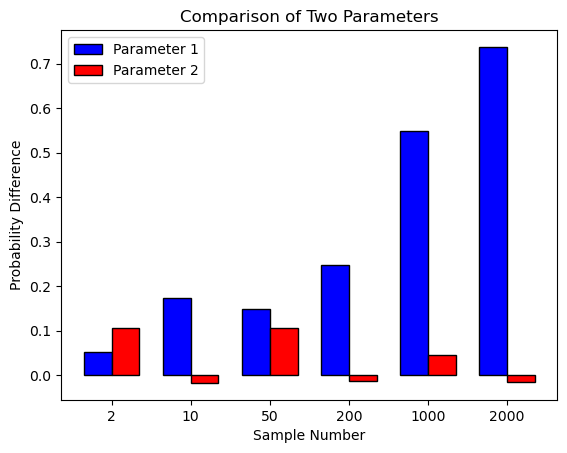

In [20]:
plot_comparison(prob_opt_list_1, prob_opt_list_4, sample_number, 'prob_opt')
plot_comparison(prob_diff_list_1, prob_diff_list_4, sample_number, 'prob_diff')

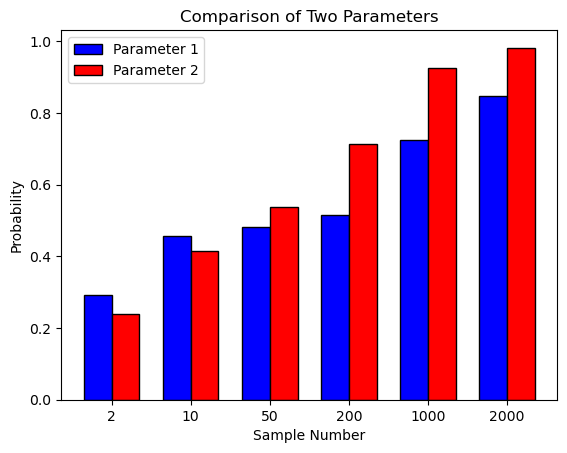

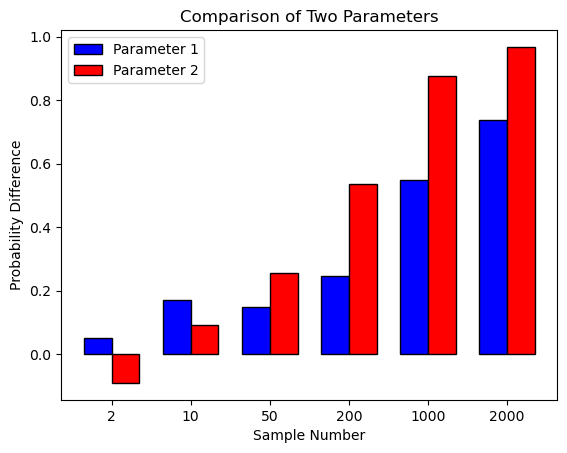

In [14]:
plot_comparison(prob_opt_list_1, prob_opt_list_2, sample_number, 'prob_opt')
plot_comparison(prob_diff_list_1, prob_diff_list_2, sample_number, 'prob_diff')

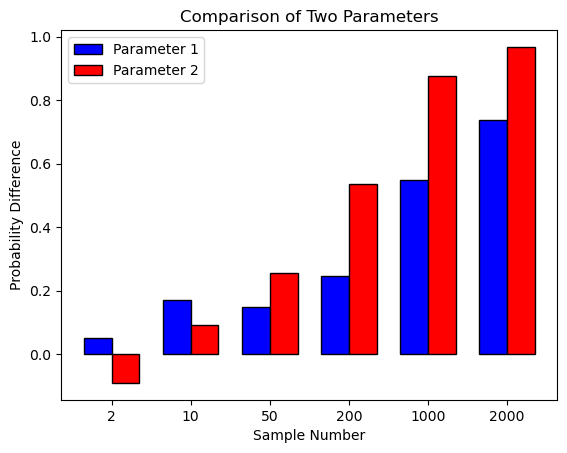

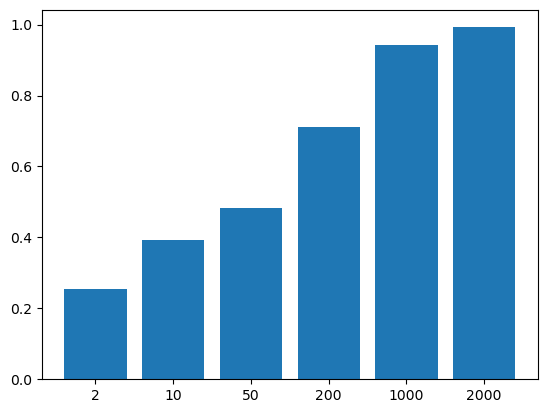

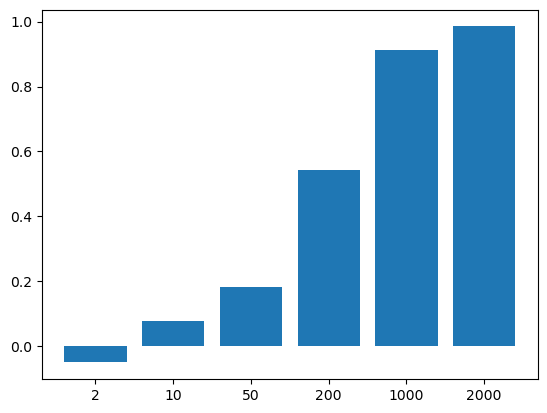

In [30]:
plt.bar(range(len(prob_opt_list)), prob_opt_list)
plt.xticks(range(len(prob_opt_list)), sample_number)
plt.show()

plt.bar(range(len(prob_diff_list)), prob_diff_list)
plt.xticks(range(len(prob_opt_list)), sample_number)
plt.show()

In [1]:
r = [3.2701236422941093, 3.3207149493214994, 3.556858029428708]
c, q = 3.7856629820554946, 1.7096129150007453
sample_args = {
        'type': 'pareto',
        'params': [2.0033248484659976, 1.9462659915572313, 2.0148555044660448]
    }

In [2]:
from ParallelSolve import baggingTwoPhase, gurobi_SSKP, SSKP_eval_wSol
from utils.SSKP_samples import genSample_SSKP
import numpy as np

rng = np.random.default_rng(seed=2024)
sample_n = genSample_SSKP(10000, rng, type = sample_args['type'], params = sample_args['params'])
B1 = 20
B2 = 400
k = 10

SAA_twoPhase, x_count,  retrieved_solutions = baggingTwoPhase(sample_n, B1, B2, k, 0, gurobi_SSKP, SSKP_eval_wSol, rng, False, r, c, q)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Set parameter Username
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13
Academic license - for non-commercial use only - expires 2025-03-13
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-13


In [5]:
retrieved_solutions

[(0, 0, 1), (1, 0, 0), (0, 1, 0)]

In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt

# with open("SSKP_prob_comparison.json", 'r') as f:
#     results = json.load(f)

def plot_comparison(dist_1, dist_2, sample_number, name):
    n_groups = len(sample_number)
    bar_width = 0.35  # Width of the bars
    index = np.arange(n_groups)  # Position of groups

    fig, ax = plt.subplots()

    bars1 = ax.bar(index - bar_width/2, dist_1, bar_width, label='Setting 1', color='b', edgecolor='black')
    bars2 = ax.bar(index + bar_width/2, dist_2, bar_width, label='Setting 2', color='r', edgecolor='black')

    ax.set_xlabel('Sample Number')
    if name == 'prob_opt':
        ax.set_ylabel('Probability')
    elif name == 'prob_diff':
        ax.set_ylabel('Probability Difference')
    ax.set_title(name)
    ax.set_xticks(index)
    ax.set_xticklabels(sample_number)
    ax.legend()
    plt.savefig(name + '.png')
    plt.show()

In [37]:
results.keys()

dict_keys(['SAA_prob_opt_list', 'SAA_prob_diff_list', 'SAA_prob_dist_list', 'bagging_prob_opt_list', 'bagging_prob_diff_list', 'bagging_prob_dist_list', 'x_star'])

In [38]:
A = -np.log([1 - item for item in results["SAA_prob_opt_list"]])
B1 = -np.log([1- item for item in results["bagging_prob_opt_list"][0][0]])
B2 = -np.log([1- item for item in results["bagging_prob_opt_list"][0][1]])

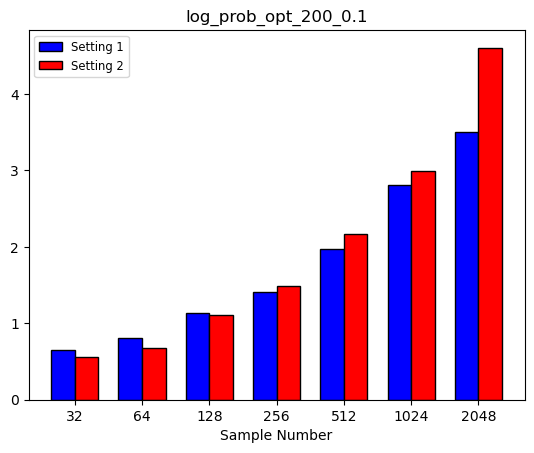

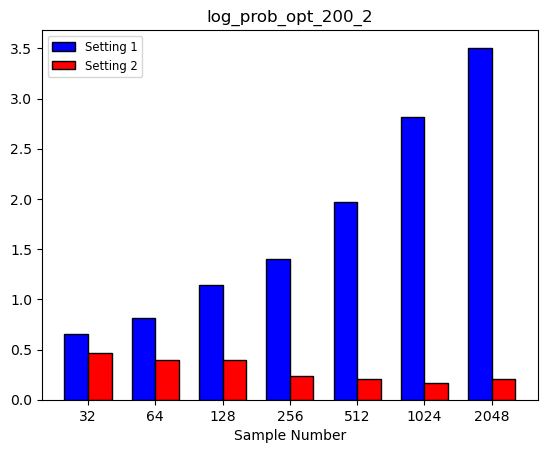

In [39]:
sample_number = np.array([2**i for i in range(5, 12)])

plot_comparison(A, B1, sample_number, 'log_prob_opt_200_0.1')
plot_comparison(A, B2, sample_number, 'log_prob_opt_200_2')

In [63]:
import json
with open("obj_lists.json", "r") as f:
    results = json.load(f)

In [64]:
from SSKP_alg34 import plot_twoPhase, plot_CI_twoPhase
results.keys()

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])

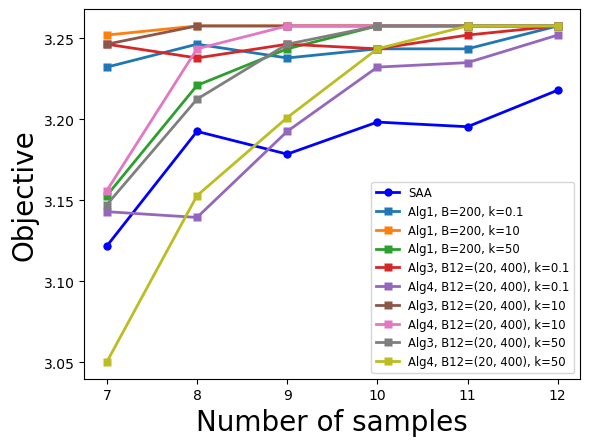

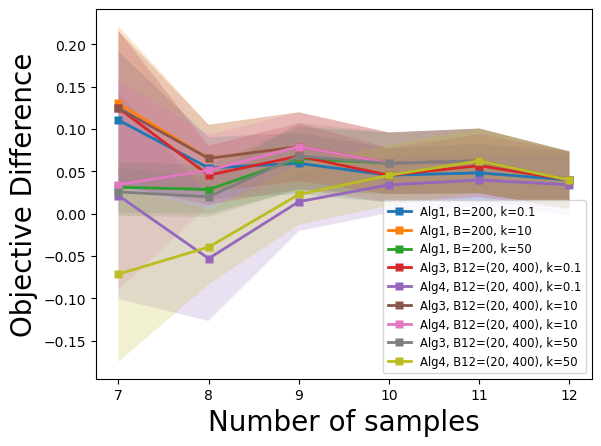

In [68]:
sample_number = np.array([2**i for i in range(7, 13)])
B_list = [200]
k_list = [0.1,10, 50]
B12_list = ['X','X', (20,400)]
plot_twoPhase(results["SAA_obj_avg"], results["bagging_alg1_obj_avg"], results["bagging_alg3_obj_avg"], results["bagging_alg4_obj_avg"], np.log2(sample_number), B_list, k_list, B12_list)
plot_CI_twoPhase(results["SAA_obj_list"], results["bagging_alg1_obj_list"], results["bagging_alg3_obj_list"], results["bagging_alg4_obj_list"], np.log2(sample_number), B_list, k_list, B12_list)